# MNIST Classification - From MLPs to ConvNets

For this practical we are going to train a small network for digit classification on images. 

First, we are going to train an MLP classifier, using only Dense layers (and dropout). 

Next, we are going to replace the MLP with a ConvNet, using Convolutional Layers, Max Pooling etc. 

Your task is to try variations of the above and compare their performance. Do pay attention to the order of layers in ConvNets and their importance in performance increase. 

### The MNIST Dataset

Keras makes it very easy to use the MNIST dataset by simply loading it. Explore the data and plot it.

In [1]:
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Using TensorFlow backend.


In [2]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Printing the 47187th sample with label 1


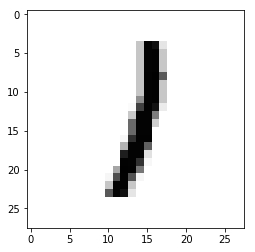

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline
import random

n_th_image = random.randint(0, x_train.shape[0])  # We print a random image every time
print(f"Printing the {n_th_image}th sample with label {y_train[n_th_image]}")
plt.imshow(x_train[n_th_image], cmap='Greys')

#### Some technicalities 

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28, 1)


#### Normalizing the images

In [5]:
x_train /= 255
x_test /= 255

## 1. MLP model

Building the MLP model

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

mlp_model = Sequential()
mlp_model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(10,activation='softmax'))

Training the MLP model

In [7]:
mlp_model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
mlp_model.fit(x=x_train,y=y_train, validation_data=(x_test, y_test), epochs=10)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.7864 - accuracy: 0.7620 - val_loss: 0.3197 - val_accuracy: 0.9079
Epoch 2/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.3306 - accuracy: 0.9042 - val_loss: 0.2400 - val_accuracy: 0.9284
Epoch 3/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.2628 - accuracy: 0.9239 - val_loss: 0.1991 - val_accuracy: 0.9411
Epoch 4/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.2237 - accuracy: 0.9344 - val_loss: 0.1773 - val_accuracy: 0.9468
Epoch 5/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.1980 - accuracy: 0.9434 - val_loss: 0.1586 - val_accuracy: 0.9524
Epoch 6/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.1769 - accuracy: 0.9481 - val_loss: 0.1582 - val_accuracy: 0.9519
Epoch 7/10
60000/60000 [==============================] - 3s 51us/s

### TASK 1: Build your own MLP model
Try to use different amount of dense layers, variations of dropout etc. Report your architecture with the best results

In [8]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten

# my_mlp_model = Sequential()
# my_mlp_model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
###### YOUR LAYERS HERE

# my_mlp_model.add(Dense(??, activation=??))
# my_mlp_model.add(Dropout(??))

############
# my_mlp_model.add(Dense(10,activation='softmax'))

# my_mlp_model.compile(optimizer='sgd', 
#               loss='sparse_categorical_crossentropy', 
#               metrics=['accuracy'])
# my_mlp_model.fit(x=x_train,y=y_train, validation_data=(x_test, y_test), epochs=10)

### ConvNet

Building the ConvNet model

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, Activation

conv_model = Sequential()
conv_model.add(Conv2D(16, kernel_size=(3,3)))
conv_model.add(BatchNormalization())
conv_model.add(Activation('relu'))
conv_model.add(Conv2D(16, kernel_size=(3,3),activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
conv_model.add(Dense(10,activation='softmax'))

Training the ConvNet model

In [23]:
conv_model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
conv_model.fit(x=x_train,y=y_train, validation_data=(x_test, y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2029 - accuracy: 0.9397 - val_loss: 0.0829 - val_accuracy: 0.9759
Epoch 2/5
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0787 - accuracy: 0.9762 - val_loss: 0.0690 - val_accuracy: 0.9784
Epoch 3/5
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0609 - accuracy: 0.9815 - val_loss: 0.0536 - val_accuracy: 0.9812
Epoch 4/5
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0519 - accuracy: 0.9839 - val_loss: 0.0486 - val_accuracy: 0.9842
Epoch 5/5
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0450 - accuracy: 0.9863 - val_loss: 0.0509 - val_accuracy: 0.9830


## TASK 2: Build your own ConvNet
Try different variations of layers, more convolutions, with/without dropout, more/less fully connected layer at the end. Report your best result. 

Optional: Can you build it without fully connected layers at the end? (Hint: Use number of channels in the output)

In [24]:
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization

# my_conv_model = Sequential()

###### YOUR LAYERS HERE ######
# my_conv_model.add(Conv2D(??, kernel_size=(?,?)))
# my_conv_model.add(BatchNormalization())
# my_conv_model.add(MaxPooling2D(pool_size=(? ?)))

##############################

# my_conv_model.compile(optimizer='sgd', 
#               loss='sparse_categorical_crossentropy', 
#               metrics=['accuracy'])
# my_conv_model.fit(x=x_train,y=y_train, validation_data=(x_test, y_test), epochs=10)

## Plotting evaluation results

1


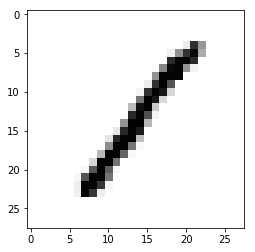

In [25]:
model = conv_model # SET YOUR MODEL HERE (mlp_model, conv_model, my_mlp_model or my_conv_model)
random_index = random.randint(0, x_test.shape[0])
plt.imshow(x_test[random_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[random_index].reshape(1, 28, 28, 1))
print(pred.argmax())

### TASK 3 (optional): Try different normalization techniques and compare results with the previous

### TASK 4 (optional): Try different optimizers (ADAM, RMSProp etc)

### TASK 5 (optional): Compare execution time for 10 epochs of an MLP and a ConvNet with the same number of layers. 
Which one is faster? How does this relate to the number of parameters? What about the computation?

#### Write a list of conclusions here: 

E.g: Dropout is useless in ConvNets, BatchNorm is good etc
